# Laboratorio 4 - Minería de Datos
**Universidad Técnica Nacional**  
**Curso: ISW 911 - Minería de Datos**  
**Grupo:** <br>
*   Cristopher Sanabria Hidalgo
*   Andrey Guerrero Vargas





In [61]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar gráficos bonitos
sns.set(style="whitegrid")


In [136]:
import pandas as pd

url = "https://raw.githubusercontent.com/guerrdev/conjunto-datos-lab-04/refs/heads/main/Datos_Abiertos_ARESEP_Fiscalizaci_n_calidad_de_la_tensi_n_el_ctrica..csv"
# Leer el dataset
df = pd.read_csv(url)

# Visualizamos las primeras filas
df.head()

,Id Tipo Medición,Tipo Medición,Conformidad,Operación,Provincia,Cantón,Distrito,Código DTA,Año,X,Y
0,SD,SD,SÍ,ICE,LIMÓN,POCOCÍ,CARIARI,70205,2021,533066.15,1149066.67
1,SD,SD,SÍ,ICE,LIMÓN,POCOCÍ,CARIARI,70205,2021,533435.90,1148915.60
2,SD,SD,SÍ,ICE,LIMÓN,POCOCÍ,CARIARI,70205,2021,530640.84,1146339.39
3,SD,SD,SÍ,ICE,LIMÓN,POCOCÍ,JIMÉNEZ,70202,2021,533024.55,1134877.03
4,SD,SD,SÍ,ICE,LIMÓN,POCOCÍ,JIMÉNEZ,70202,2021,533024.55,1134877.03


In [116]:
# Información general del conjunto de datos
df.info()

# Estadísticas descriptivas
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5970 entries, 0 to 5969
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id Tipo Medición  5970 non-null   object 
 1   Tipo Medición     5970 non-null   object 
 2   Conformidad       5968 non-null   object 
 3   Operación         5968 non-null   object 
 4   Provincia         5970 non-null   object 
 5   Cantón            5970 non-null   object 
 6   Distrito          5970 non-null   object 
 7   Código DTA        5970 non-null   int64  
 8   Año               5970 non-null   int64  
 9   X                 5970 non-null   float64
 10  Y                 5970 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 513.2+ KB


,Id Tipo Medición,Tipo Medición,Conformidad,Operación,Provincia,Cantón,Distrito,Código DTA,Año,X,Y
count,5970,5970,5968,5968,5970,5970,5970,5970.000000,5970.000000,5970.000000,5.970000e+03
unique,4318,3,4,10,7,84,392,NaN,NaN,NaN,NaN
top,SD,MONOFÁSICO,SÍ,ICE,SAN JOSÉ,SAN CARLOS,SAN RAFAEL,NaN,NaN,NaN,NaN
freq,1653,3739,5229,2252,1716,452,210,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31364.605193,2019.503350,475431.479572,1.107786e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19468.414381,1.056015,60494.016284,3.971975e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10101.000000,2018.000000,301785.709000,9.318080e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11802.000000,2019.000000,453069.017300,1.094802e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21308.000000,2020.000000,486907.527100,1.104023e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50201.000000,2020.000000,500120.557025,1.125848e+06


In [137]:
# Cambiar nombres de columnas
df.rename(columns={
    'Id Tipo Medición': 'Id_Tipo_Medicion',
    'Tipo Medición': 'Tipo_Medicion',
    'Operación': 'Operacion',
    'Cantón': 'Canton',
    'Código DTA': 'Codigo_DTA',
    'Año': 'Anio',
}, inplace=True)

# Confirmar el cambio
df.columns



Index(['Id_Tipo_Medicion', 'Tipo_Medicion', 'Conformidad', 'Operacion',
       'Provincia', 'Canton', 'Distrito', 'Codigo_DTA', 'Anio', 'X', 'Y'],
      dtype='object')

In [138]:
# 1. Primero reemplazar valores erróneos
df['Conformidad'] = df['Conformidad'].replace({
    'SÍ': 'SI',  # Normalizamos sin tilde
    '7': 'SI',   # Interpretamos 7 como "SI"
    '4': 'NO'    # Interpretamos 4 como "NO"
})

# 2. Luego codificar SI/NO a 1/0
df['Conformidad'] = df['Conformidad'].map({'SI': 1, 'NO': 0})

# 3. Imputar valores nulos si existen (rellenar con la moda, el valor más común)
moda_conformidad = df['Conformidad'].mode()[0]  # obtiene el valor más frecuente


df['Conformidad'] = df['Conformidad'].fillna(moda_conformidad)


df['Conformidad'] = df['Conformidad'].map({1: 'SI', 0: 'NO'})

# 4. Confirmamos el resultado
print(df['Conformidad'].unique())


['SI' 'NO']


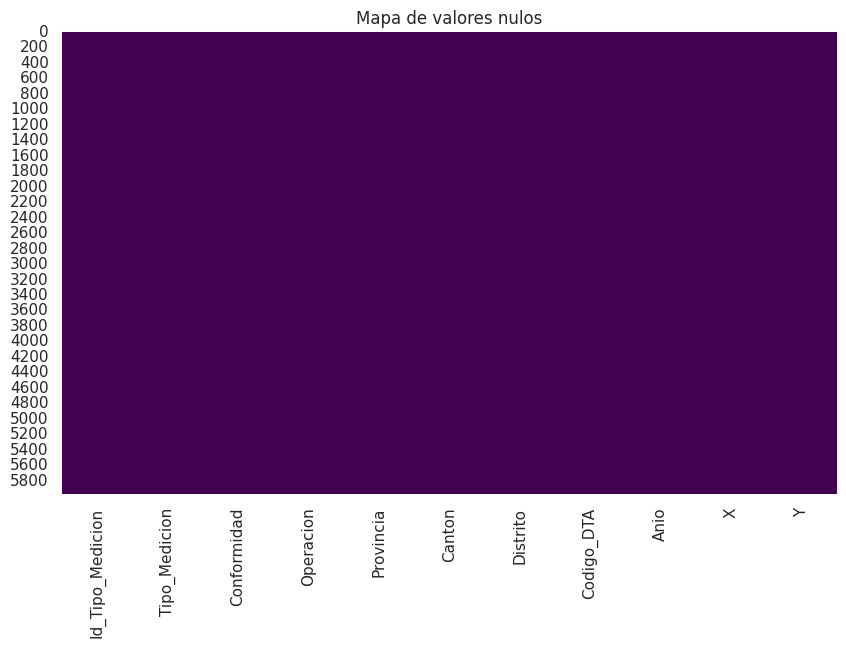

In [139]:
# Conteo de nulos
df.isnull().sum()

# Gráfico de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de valores nulos')
plt.show()


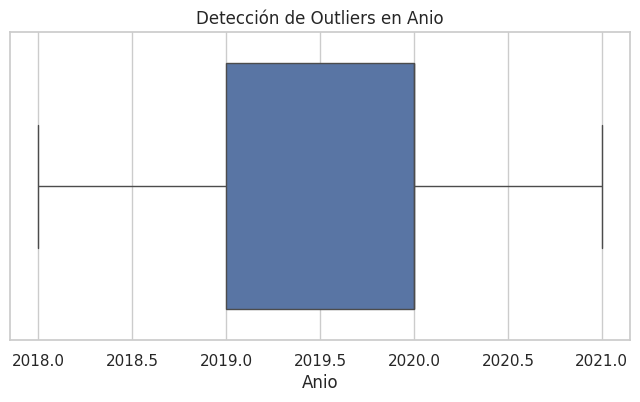

In [140]:
# Boxplot para identificar outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Anio'])
plt.title('Detección de Outliers en Anio')
plt.show()


In [141]:
# Función para imputar valores nulos
def imputar_nulos(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                # Para strings, rellenamos con "desconocido"
                df[col].fillna('desconocido')
            else:
                # Para números, rellenamos con la media
                df[col].fillna(df[col].mean())
    return df

# Aplicamos la imputación
df = imputar_nulos(df)




In [143]:
# Función para detectar y corregir outliers en 'anio'
def corregir_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[columna] = np.where(df[columna] > limite_superior, limite_superior,
                          np.where(df[columna] < limite_inferior, limite_inferior, df[columna]))
    return df

# Aplicamos la corrección
df = corregir_outliers(df, 'Anio')


In [144]:
# Convertimos año a int por si acaso
df['Anio'] = df['Anio'].astype(int)


In [145]:
from sklearn.preprocessing import LabelEncoder

# Instanciamos el codificador
le = LabelEncoder()

# Codificamos todas las columnas tipo string
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Verificamos
df.head()


,Id_Tipo_Medicion,Tipo_Medicion,Conformidad,Operacion,Provincia,Canton,Distrito,Codigo_DTA,Anio,X,Y
0,3739,1,1,8,4,53,50,70205,2021,533066.15,1149066.67
1,3739,1,1,8,4,53,50,70205,2021,533435.90,1148915.60
2,3739,1,1,8,4,53,50,70205,2021,530640.84,1146339.39
3,3739,1,1,8,4,53,144,70202,2021,533024.55,1134877.03
4,3739,1,1,8,4,53,144,70202,2021,533024.55,1134877.03


In [146]:
from sklearn.preprocessing import MinMaxScaler

# Instanciamos el normalizador
scaler = MinMaxScaler()

# Normalizamos todo el dataset
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Verificamos
df_normalizado.head()


,Id_Tipo_Medicion,Tipo_Medicion,Conformidad,Operacion,Provincia,Canton,Distrito,Codigo_DTA,Anio,X,Y
0,0.866111,0.5,1.0,0.8,0.666667,0.638554,0.127877,0.993389,1.0,0.663880,0.704453
1,0.866111,0.5,1.0,0.8,0.666667,0.638554,0.127877,0.993389,1.0,0.664942,0.703963
2,0.866111,0.5,1.0,0.8,0.666667,0.638554,0.127877,0.993389,1.0,0.656919,0.695609
3,0.866111,0.5,1.0,0.8,0.666667,0.638554,0.368286,0.993339,1.0,0.663761,0.658443
4,0.866111,0.5,1.0,0.8,0.666667,0.638554,0.368286,0.993339,1.0,0.663761,0.658443


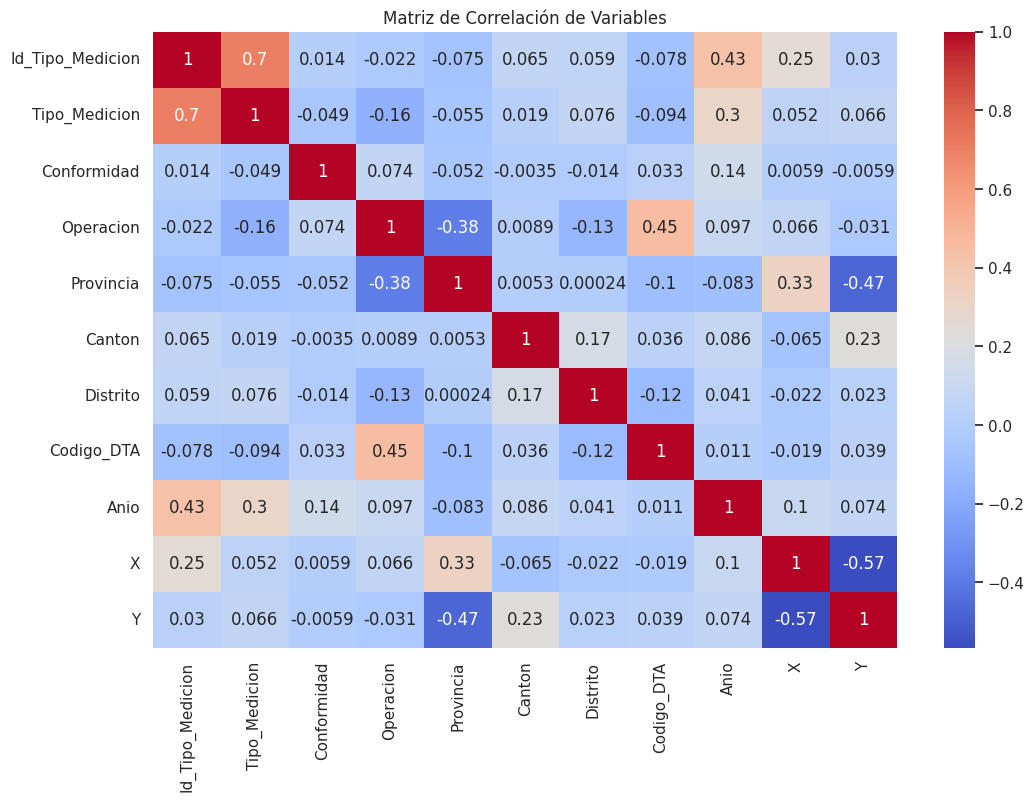

In [147]:
# Matriz de correlación
corr = df_normalizado.corr()

# Gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables')
plt.show()


Distribución de la variable 'Conformidad':
Conformidad
1    87.839196
0    12.160804
Name: proportion, dtype: float64


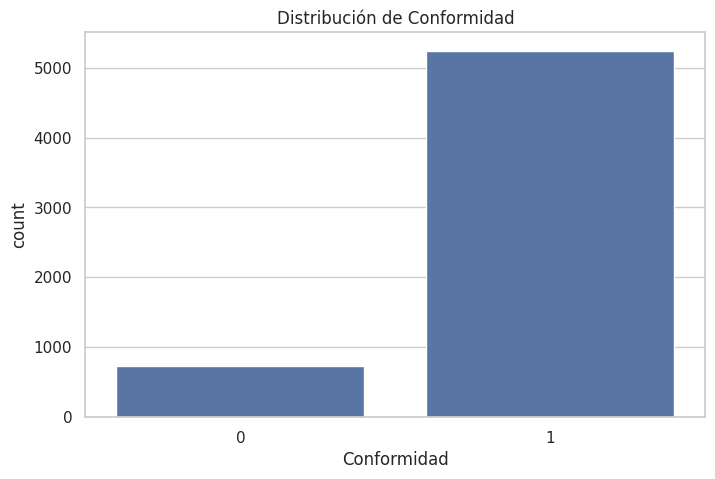

In [148]:
# Análisis de la variable 'Conformidad'
print("Distribución de la variable 'Conformidad':")
print(df['Conformidad'].value_counts(normalize=True) * 100)

# Gráfico de distribución
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Conformidad')
plt.title('Distribución de Conformidad')
plt.show()

In [149]:
# Guardar el nuevo dataset
df_normalizado.to_csv('data_process.csv', index=False)
